In [216]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,  confusion_matrix

# 第一部分

第一題

In [217]:
df = pd.read_csv("insurance.csv")
df
df=df.astype(str)

第二題

In [218]:

# 使用 OneHotEncoder 編碼 sex, smoker, region
onehot_encoder = OneHotEncoder()
encoded = onehot_encoder.fit_transform(df[['sex', 'smoker', 'region']]).toarray()
df_encoded = pd.concat([df.drop(['sex', 'smoker', 'region'], axis=1), pd.DataFrame(encoded)], axis=1)

# 使用 StandardScaler 編碼 age, bmi, charges
standard_scaler = StandardScaler()
df_encoded['age'] = standard_scaler.fit_transform(df_encoded[['age']])
df_encoded['bmi'] = standard_scaler.fit_transform(df_encoded[['bmi']])
df_encoded['charges'] = standard_scaler.fit_transform(df_encoded[['charges']])

# 使用 LabelEncoder 編碼 children
le = LabelEncoder()
df_encoded['children'] = le.fit_transform(df_encoded['children'])

第三題

In [219]:
# 資料集劃分為訓練集與測試集
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

第四題

In [220]:
# 建立並訓練 Linear Regression 模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 建立並訓練 SVM (SVR) 模型
svm = SVR()
svm.fit(X_train, y_train)

# 建立並訓練 Decision Tree 模型
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

第五題

In [221]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 0.742
Test set score: 0.770


In [222]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 0.851
Test set score: 0.858


In [223]:
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 1.000
Test set score: 0.731


In [224]:
# 使用訓練好的模型對測試集進行預測，並計算 R2、RMSE 和 MAE 指標
models = [lr, svm, dt]
model_names = ['Linear Regression', 'SVM', 'Decision Tree']
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{model_names[i]}: R2={r2:.4f}, RMSE={rmse:.2f}, MAE={mae:.2f}')

Linear Regression: R2=0.7696, RMSE=0.48, MAE=0.34
SVM: R2=0.8583, RMSE=0.38, MAE=0.19
Decision Tree: R2=0.7315, RMSE=0.52, MAE=0.24


# 第二部分

第一題

In [225]:
df2 = pd.read_csv("customer_churn.csv")
df2

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54023,1,1.0,Computer,1,31.0,Debit Card,Male,4.0,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149
1,50266,0,16.0,Mobile Phone,1,18.0,Debit Card,Male,2.0,4,Grocery,4,Married,2,0,11.0,0.0,NaN,9.0,243
2,54985,0,16.0,Mobile Phone,1,36.0,Credit Card,Male,3.0,6,Laptop & Accessory,1,Single,6,0,20.0,2.0,2.0,1.0,168
3,52029,1,0.0,Phone,3,NaN,E wallet,Male,2.0,4,Mobile,4,Married,2,1,18.0,0.0,1.0,0.0,124
4,50084,0,13.0,Computer,1,15.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Divorced,10,0,14.0,1.0,1.0,2.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,51224,0,13.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,3,Grocery,5,Married,3,0,11.0,NaN,11.0,16.0,268
3079,51396,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
3080,52017,0,NaN,Mobile Phone,1,16.0,Debit Card,Male,2.0,3,Mobile,4,Married,2,0,14.0,1.0,1.0,0.0,120
3081,50355,1,0.0,Computer,1,13.0,Debit Card,Female,NaN,3,Mobile,3,Divorced,2,1,16.0,0.0,1.0,2.0,129


第二題

In [226]:
print(f"Number of data points: {len(df2)}")

# 列出屬性數量
print(f"Number of attributes: {len(df2.columns)}")

# 列出每個欄位的空值個數
print("Number of missing values for each column:")
print(df2.isnull().sum())

# 列出各類別(target)的資料筆數
print("Number of data points for each target class:")
print(df2['Churn'].value_counts())

Number of data points: 3083
Number of attributes: 20
Number of missing values for each column:
CustomerID                       0
Churn                            0
Tenure                         153
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                154
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 150
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    131
CouponUsed                     126
OrderCount                     128
DaySinceLastOrder              166
CashbackAmount                   0
dtype: int64
Number of data points for each target class:
0    2132
1     951
Name: Churn, dtype: int64


第三題

In [227]:
df2.drop_duplicates(inplace=True)

# 列出剩餘的資料筆數
print('剩餘資料筆數:', len(df2))

剩餘資料筆數: 3078


第四題

In [228]:
# 填補空值 (使用平均數)
df2.fillna(df2.mean(), inplace=True)

In [229]:
print(df2.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [230]:
le = LabelEncoder()

# 將指定欄位進行 label encoding
df2['PreferredLoginDevice'] = le.fit_transform(df2['PreferredLoginDevice'])
df2['PreferredPaymentMode'] = le.fit_transform(df2['PreferredPaymentMode'])
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['PreferedOrderCat'] = le.fit_transform(df2['PreferedOrderCat'])
df2['MaritalStatus'] = le.fit_transform(df2['MaritalStatus'])

le = LabelEncoder()
df2['Churn'] = le.fit_transform(df2['Churn'])
# 將指定欄位進行 one-hot encoding
df2 = pd.get_dummies(df2, columns=['CityTier'])

In [231]:
#df2['CityTier'].value_counts()

In [232]:
df2['Churn']=df2['Churn'].astype(int)

第五題

In [233]:


X = df2.drop(['CustomerID','Churn'], axis=1) # 設定特徵欄位
y = df2['Churn'] # 設定目標欄位
X.columns = X.columns.astype(str)

# 切割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('訓練集資料筆數:', len(X_train))
print('測試集資料筆數:', len(X_test))


訓練集資料筆數: 2462
測試集資料筆數: 616


In [234]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 建立並訓練 SVM (SVR) 模型
svm = SVR()
svm.fit(X_train, y_train)

# 建立並訓練 Decision Tree 模型
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeRegressor()

In [235]:
models = [lr, svm, dt]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree']
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{model_names[i]}: R2={r2:.4f}, RMSE={rmse:.2f}, MAE={mae:.2f}')

Logistic Regression: R2=0.2496, RMSE=0.40, MAE=0.16
SVM: R2=0.0978, RMSE=0.44, MAE=0.32
Decision Tree: R2=0.7224, RMSE=0.25, MAE=0.06


6、7一起寫

In [236]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 0.824
Test set score: 0.838


In [237]:
# 第一組超參數設定
lr1 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr1.fit(X_train, y_train)

train_score1 = lr1.score(X_train, y_train)
test_score1 = lr1.score(X_test, y_test)

print("First hyperparameter setting:")
print(f"Training set score: {train_score1:.3f}")
print(f"Test set score: {test_score1:.3f}\n")

# 第二組超參數設定
lr2 = LogisticRegression(solver='liblinear', max_iter=500)
lr2.fit(X_train, y_train)

train_score2 = lr2.score(X_train, y_train)
test_score2 = lr2.score(X_test, y_test)

print("Second hyperparameter setting:")
print(f"Training set score: {train_score2:.3f}")
print(f"Test set score: {test_score2:.3f}")



First hyperparameter setting:
Training set score: 0.823
Test set score: 0.843

Second hyperparameter setting:
Training set score: 0.823
Test set score: 0.844


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


這裡設置了兩組不同的超參數：一組使用 l2 正則化，另一組不使用正則化。從結果可以看到， C=0.1 且使用 l2 正則化似乎是一個比較好的超參數設定。

In [238]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 0.113
Test set score: 0.098


In [239]:
# 設定第一組超參數
svm_1 = SVR(kernel='rbf', C=1, gamma='scale')
svm_1.fit(X_train, y_train)
train_score_1 = svm_1.score(X_train, y_train)
test_score_1 = svm_1.score(X_test, y_test)
print(f"First hyperparameter setting:")
print(f"Training set score: {train_score_1:.3f}")
print(f"Test set score: {test_score_1:.3f}")
print("")

# 設定第二組超參數
svm_2 = SVR(kernel='linear', C=0.1, gamma='scale')
svm_2.fit(X_train, y_train)
train_score_2 = svm_2.score(X_train, y_train)
test_score_2 = svm_2.score(X_test, y_test)
print(f"Second hyperparameter setting:")
print(f"Training set score: {train_score_2:.3f}")
print(f"Test set score: {test_score_2:.3f}")
print("")


First hyperparameter setting:
Training set score: 0.113
Test set score: 0.098

Second hyperparameter setting:
Training set score: 0.288
Test set score: 0.297



第一組超參數使用 rbf 核函數，C 為 1，gamma 為 scale；第二組超參數使用 linear 核函數，C 為 0.1，gamma 為 scale。

In [240]:
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(f"Training set score: {train_score:.3f}")
print(f"Test set score: {test_score:.3f}")

Training set score: 1.000
Test set score: 0.722


In [241]:
# 設定第一組超參數
dt_1 = DecisionTreeRegressor(max_depth=3, min_samples_split=2)
dt_1.fit(X_train, y_train)
train_score_1 = dt_1.score(X_train, y_train)
test_score_1 = dt_1.score(X_test, y_test)
print(f"First hyperparameter setting:")
print(f"Training set score: {train_score_1:.3f}")
print(f"Test set score: {test_score_1:.3f}")
print("")

# 設定第二組超參數
dt_2 = DecisionTreeRegressor(max_depth=5, min_samples_split=4)
dt_2.fit(X_train, y_train)
train_score_2 = dt_2.score(X_train, y_train)
test_score_2 = dt_2.score(X_test, y_test)
print(f"Second hyperparameter setting:")
print(f"Training set score: {train_score_2:.3f}")
print(f"Test set score: {test_score_2:.3f}")
print("")


First hyperparameter setting:
Training set score: 0.409
Test set score: 0.388

Second hyperparameter setting:
Training set score: 0.519
Test set score: 0.453



第一組超參數使用 max_depth 為 3，min_samples_split 為 2；第二組超參數使用 max_depth 為 5，min_samples_split 為 4。

第八題 
可以發現logistic regression 在訓練集跟測試集都表現不錯 SVM 表現的相當差 decision tree 則是訓練異常好 

第九題

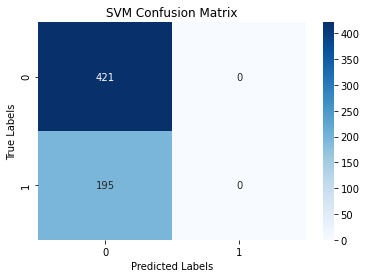

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# SVM model confusion matrix
svm_pred = svm.predict(X_test)
svm_pred=svm_pred.astype('int')
#y_test=y_test.astype('int')
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()

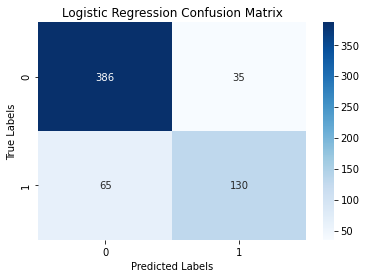

In [251]:
lr_pred = lr.predict(X_test)
#lr_pred=lr_pred.astype('int')
y_test=y_test.astype('int')
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

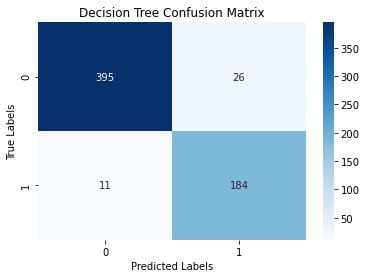

In [250]:
dt_pred = dt.predict(X_test)
#dt_pred=dt_pred.astype('int')
y_test=y_test.astype('int')

dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

可以發現svm模型在TP表現最好，FN其次。 lr跟dt都在辨識正樣本與負樣本的能力方面很不錯，dt尤為不錯